<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/w12_text_data_analysis_yleekim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴스 카테고리 분류

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(X_train.shape, '학습용 뉴스 기사')
print(X_test.shape, '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
(8982,) 학습용 뉴스 기사
(2246,) 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


## LSTM으로 분류하기

In [15]:
# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 35s 71ms/step - loss: 2.2036 - accuracy: 0.4382 - val_loss: 1.8593 - val_accuracy: 0.5427
Epoch 2/200
450/450 [==============================] - 9s 19ms/step - loss: 1.7177 - accuracy: 0.5592 - val_loss: 1.6612 - val_accuracy: 0.5908
Epoch 3/200
450/450 [==============================] - 7s 15ms/step - loss: 1.5546 - accuracy: 0.6065 - val_loss: 1.5357 - val_accuracy: 0.6211
Epoch 4/200
450/450 [==============================] - 5s 11ms/step - loss: 1.3588 - accuracy: 0.6619 - val_loss: 1.4029 - val_accuracy: 0.6394
Epoch 5/200
450/450 [==============================] - 4s 10ms/step - loss: 1.2488 - accuracy: 0.6833 - val_loss: 1.2929 - val_accuracy: 0.6670
Epoch 6/200
450/450 [==============================] - 5s 10ms/step - loss: 1.1381 - accuracy: 0.7142 - val_loss: 1.2472 - val_accuracy: 0.6852
Epoch 7/200
450/450 [==============================] - 5s 10ms/step - loss: 1.0502 - accuracy: 0.7331 - val_loss: 1.2232 - val_accuracy

In [23]:
# 학습셋과 테스트셋의 오차를 저장합니다.
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(y_loss.shape[0])
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

AttributeError: ignored

In [ ]:
#분류결과 확인하기


##LSTM에 CNN 더하기

# 2. networkx의 기본 사용법 살펴보기

In [1]:
import networkx as nx

# 네트워크 생성
g = nx.Graph()

# 노드 생성
g.add_node(1)
g.add_nodes_from([1, 2, 3, 4, 5, 6]) # 중복으로 추가해도 에러 없음

# 노드 정보 확인
g.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [2]:
# 노드와 노드 연결(엣지 생성)
g.add_edge(1,3)
g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)])

# 엣지 정보 확인
g.edges()

EdgeView([(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)])

In [3]:
#노드 수
print(g.number_of_nodes())

6


In [4]:
#엣지 수
print(g.number_of_edges())

7


In [5]:
len(g.edges())

7

In [6]:
#노드의 속성 설정
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'

#노드의 속성 출력
print(nx.get_node_attributes(g, 'gender'))

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}


In [7]:
#노드 간의 연결 강도 설정
g[1][3]['weight'] = 3
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4

print(nx.get_edge_attributes(g, 'weight'))

{(1, 3): 3, (2, 4): 1, (2, 5): 4, (2, 6): 3, (3, 4): 2, (4, 6): 3, (5, 6): 4}


In [8]:
#노드 4와 연결된 노드
g[4]

AtlasView({2: {'weight': 1}, 3: {'weight': 2}, 6: {'weight': 3}})

In [9]:
#노드 4와 연결된 노드 수
len(list(g.neighbors(4)))

3

In [10]:
#노드 4와 연결된 노드 수
g.degree(4)

3

In [11]:
#노드 4와 노드 2간의 연결 강도
g[4][2]

{'weight': 1}

In [12]:
#그래프의 연결
nx.degree(g)

DegreeView({1: 1, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3})

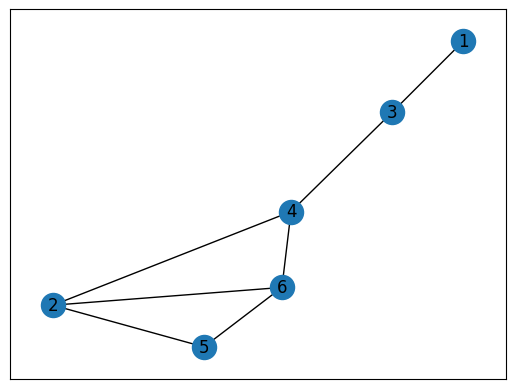

In [13]:
#그래프 시각화
import matplotlib.pyplot as plot
nx.draw_networkx(g)
plot.show()

In [14]:
#연결중심성
nx.degree_centrality(g)

{1: 0.2,
 2: 0.6000000000000001,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.4,
 6: 0.6000000000000001}

In [15]:
#매개중심성
nx.betweenness_centrality(g)

{1: 0.0,
 2: 0.15000000000000002,
 3: 0.4,
 4: 0.6000000000000001,
 5: 0.0,
 6: 0.15000000000000002}

In [16]:
#근접중심성
nx.closeness_centrality(g)

{1: 0.38461538461538464,
 2: 0.625,
 3: 0.5555555555555556,
 4: 0.7142857142857143,
 5: 0.45454545454545453,
 6: 0.625}

# 2. SNA 실습

## step0- 사전 환경 셋팅


*   konlpy, WordCloud 설치
*   한글 폰트 설치

In [17]:
# konlpy 설치
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.1 MB/s eta 0:00:00


In [ ]:
# konlpy가 정상적으로 설치되었는지 확인
from konlpy.tag import Okt

okt = Okt()
okt.nouns('나는 지금부터 의미 연결망 분석 실습을 하려고 한다. 무엇을 할 수 있을까? ')

In [19]:
# 워드 클라우드 설치
!pip install WordCloud

In [20]:
# 한글폰트 설치
# 폰트 설치 완료 후, [런타임 > 런타임 다시 시작] 진행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,817 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and dire

In [21]:
# 'Nanum'이라는 단어가 들어간 폰트 출력
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts()
[f for f in fonts if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf']

In [22]:
text = '''따지고 보면 클래식 음악계만큼 남성 중심적인 분야도 없다. 정치권은 물론 재계에서도 ‘여풍(女風)’이 분 지 오래지만, 클래식 음악계는 아직도 20세기다. 이렇다 할 여성 지휘자도, 작곡가도 없다. 세계적인 오케스트라는 하나같이 ‘남자 지휘자’가 ‘남자 악장’과 손발을 맞춰 ‘남자 위주의 단원’들을 이끄는 구조다.

100년 넘게 이어져온 이런 남성 중심의 오케스트라 시스템에 변화의 바람이 불고 있다. 세계 최고 오케스트라로 꼽히는 베를린 필하모닉은 사상 처음 여성 악장을 임명했고, 미국의 명문 관현악단인 뉴욕 필하모닉은 180년 역사상 처음으로 여성 단원 수가 남성보다 많게 재편했다. 전문가들은 “사회 전반을 휩쓴 남녀평등, 여권 신장 등의 이슈가 이제야 클래식 음악계에 닿은 것”이라며 “세계적인 오케스트라를 이끄는 여성 상임 지휘자가 나올 날도 머지않았다”는 전망을 내놨다.
19일 외신에 따르면 베를린 필하모닉은 지난 17일 라트비아 출신 바이올리니스트 비네타 사레이카를 악장으로 임명했다. 베를린 필이 여성 악장을 임명한 건 1882년 설립 이후 처음이다. 악장은 단원 전체를 통솔하고 지휘자를 보조하는 중요한 자리다. 전체적인 소리의 균형을 맞추는 것도, 지휘자에게 곡의 해석과 연주 방향에 대한 의견을 제시하는 것도 악장 몫이다. 지휘자가 선생님이라면 악장은 반장인 셈이다. 그래서 악장에겐 지휘자와 함께 무대 뒤 개인 대기실을 쓸 수 있도록 예우해준다.

사레이카가 베를린 필의 ‘1호 여성 악장’ 타이틀을 갖게 된 건 그만한 경력을 갖췄기 때문이다. 그는 파리국립고등음악원을 거쳐 퀸 엘리자베스 음악 채플에서 세계적인 바이올리니스트 오귀스탱 뒤메이를 사사했다. 2012년부터 2021년까지 유명 실내악단 아르테미스 콰르텟의 연주자로 활약하며 뛰어난 연주력과 리더십, 앙상블 역량을 인정받았다. 지난해부터 베를린 필에서 연주해온 그는 올해 ‘제1바이올린 콘서트마스터 오디션’에서 우승했다.

베를린 필의 라이벌인 빈 필하모닉은 한 발 빨랐다. 2011년 불가리아 출신 바이올리니스트 알베나 다나일로바를 사상 첫 여성 악장으로 뽑았다. 독일 명문 오케스트라 베를린 슈타츠카펠레는 2017년 최초의 동양인·여성 악장으로 한국인 바이올리니스트 이지윤을 임명했다.

그동안 전통 있는 오케스트라들은 여성을 꺼렸다. 출산과 육아로 인해 최상의 연주 실력을 유지할 수 없다는 게 이유였다. 그래서 빈 필은 1996년까지는 여성에게 입단 오디션을 허용하지 않았다. 베를린 필은 1982년에야 여성 단원을 뽑았다. 이랬던 전통의 오케스트라들이 사회 변화에 맞춰 변신하고 있는 것이다.

오케스트라에 부는 여풍은 몇몇 여성 실력자를 악장으로 임명한 것에 그치지 않는다. 단원 성비가 바뀌는 등 근본적인 오케스트라 구성에 변화가 생기고 있다. 뉴욕 필하모닉은 작년 11월을 기점으로 여성 단원(45명)이 남성(44명)보다 많아졌다. 창단 180년 만에 처음 있는 일이다. 1970년대부터 연주자의 성별과 인종을 보지 않고 오직 연주 실력으로만 평가하는 블라인드 오디션을 도입하면서 오케스트라의 다양성을 확보했다는 평가다.

한국에선 오래전부터 양적인 측면에서 여성 단원이 남성을 압도했다. 국내 양대 오케스트라인 서울시향(남 31명·여 59명)과 KBS교향악단(남 28명·여 60명) 모두 여성 단원이 남성보다 두 배 많다. 음악을 전공하는 여성이 남성보다 훨씬 많다 보니 자연스럽게 여초 현상이 생겼다. 하지만 질적인 측면에선 여전히 남성 위주다. 여성이 음악감독(상임지휘자)을 맡은 오케스트라는 많지 않다. 성시연(47·경기 필하모닉), 여자경(53·강남 심포니) 정도다. 해외에서도 조앤 팔레타(69·버지니아 심포니, 버펄로 필하모닉), 마린 올솝(67·볼티모어, 상파울루 심포니), 미르가 그라지니테 틸라(37·영국 버밍엄시 심포니) 등 손에 꼽힐 정도다.

클래식 음악계 관계자는 “보수적인 클래식 음악계도 여풍이란 대세를 거스를 수는 없을 것”이라며 “시간이 걸리겠지만 해외는 물론 국내에서도 주요 오케스트라를 이끄는 여성 지휘자가 나올 가능성이 높다”고 말했다.'''

In [1]:
text = '''
생성형 AI 활용 가이드라인
교육생성형 AI 활용 가이드라인

교육
대학 view
대학원
학사정보
유연학기제
공유대학 플랫폼(학점교류)view
생성형 AI 활용 가이드라인글자 확대축소 영역글자 축소
 글자 원래대로
 글자 확대
 프린트 공유
생성형 AI 활용 가이드라인
ChatGPT 등 생성형 인공지능(Generative AI) 확산에 신속하게 대응하고, 대학 교육에서 교수 및 학습 윤리를 준수하며 생성형 AI를 활용하기 위한 가이드라인을 제시한다.

생성형 AI(Generative AI) 소개
생성형 AI란 인공신경망을 이용하여 새로운 데이터를 생성해내는 기술로 명령어를 통해 사용자의 의도를 스스로 이해하고 주어진 데이터로 학습, 활용하여 텍스트, 이미지, 오디오, 비디오 등 새로운 콘텐츠를 생성해내는 인공지능이다.
대표적인 생성형 AI로는 ChatGPT, Bard, DALL-E 2, Stable Diffusion, Midjourney 등이 있다. ChatGPT는 OpenAI에서 개발한 대화형 인공지능 모델로 사용자와 대화를 이어가며 자연스러운 문장을 스스로 생성하여 답변한다. Bard는 구글에서 개발한 대화형 인공지능 서비스로 ChatGPT와 유사하게 텍스트를 생성하는 AI이다. Dall-E 2, Midjourney 및 Stable Diffusion은 텍스트를 입력 받아 이미지를 생성하는 AI이다. 이 외에도 음성합성을 위한 모델, 단백질 구조를 예측하는 모델 등 다양한 분야의 생성형 AI가 있다.
생성형 AI 활용이 교육에 미치는 긍정적인 측면
문서, 이미지, 사운드, 영상 등 다양한 콘텐츠를 손쉽게 생성할 수 있다.
사람과 대화하듯이 질문하고 원하는 답변을 바로 얻을 수 있다는 점에서 검색 시간을 절약할 수 있다.
작곡이나 예술 창작 등에 활용하면서 인간과 생성형 AI가 협업하여 창조적인 일을 수행할 수도 있다.
단순한 채팅뿐만 아니라 문서 번역, 문서 요약, 음성 합성 등 다양한 분야에서 활용이 가능하다.
맞춤형 및 상호작용 가능한 콘텐츠를 제공하여 학습 경험을 향상시킬 수 있다.
생성형 AI 활용이 교육에 미치는 부정적인 측면
생성형 AI에 의존함으로써 비판적 사고 능력 저하, 창의력 저하, 문제해결능력 저하 등이 발생할 수 있다.
표절이나 부정행위와 같은 학문적 진실성(academic integrity) 위반 문제를 발생시킬 수 있다.
부정확한 답변이나 콘텐츠를 생산할 수 있다.
편향된 데이터로 학습된 생성형 AI를 활용할 경우, 편향된 정보를 습득할 수 있고 기존의 불평등을 강화할 수 있다.
(참고)따라서 교수자는 ChatGPT를 포함한 생성형 AI의 활용방법을 이해하고 수업목표에 따라 생성형 AI에 대한 활용 원칙을 명시하여 학습자에게 전달할 필요가 있다.

생성형 AI의 활용 옵션
교수자는 생성형 AI 활용과 관련하여 다음 3가지 옵션 중 하나를 선택하여 강의계획서에 관련 내용을 명시하도록 권고한다.

옵션 1) 생성형 AI 사용금지
수업 활동, 과제 및 시험 등 학습의 전 과정에서 어떠한 생성형 AI도 사용을 금지한다.
교수자는 학습자에게 학습 목표나 추구하는 가치 등을 포함하여 생성형 AI 활용을 허용하지 않는 이유에 대해 설명한다.
이 옵션을 선택할 경우, 학습자가 수업활동이나 과제 등을 수행하는 데 생성형 AI를 사용할 시 부정행위로 간주한다.
옵션 2) 교수자의 사전 승인 또는 출처 표기 후 생성형 AI 사용 가능
학습자는 교수자의 사전 허락을 받고 수업활동이나 과제 등에 생성형 AI를 사용할 수 있다. 이 경우 학습자는 과제물이나 수업 활동 중 생성형 AI를 언제 어떻게 사용했는지 그 이유와 사용 목적을 설명하고 명시한다.
교수자는 학습자에게 사용 가능한 생성형 AI, 활용 가능 범위, 주의사항 등에 대해 설명한다.
학습자는 수업활동이나 과제 등을 수행하는 데 생성형 AI의 사용에 대한 출처를 명확히 표기할 경우, 교수자의 사전 승인 없이도 생성형 AI를 사용할 수 있다. 이 경우 학습자는 프롬프트 실행 날짜와 프롬프트 내용(스크린 샷 가능), 생성된 결과물(스크린 샷 가능), 사용한 생성형 AI 유형 등을 명시한다.
출처 표기 (예)
텍스트 생성형 AI를 활용한 경우 (예) : ChatGPT3.5(2023. 04. 20). “프롬프트 내용.” OpenAI의 ChatGPT3.5를 이용하여 생성 또는 작성함. https://chat.openai.com/
이미지 생성형 AI를 활용한 경우 (예) : Stable Diffusion (2023. 04. 20). “프롬프트 내용.” Stable Diffusion 온라인을 이용하여 생성 또는 작성함. https://stablediffusionweb.com/
옵션 3) 자유롭게 생성형 AI 사용 가능
수업활동이나 과제를 수행하는 데 어떤 제약도 없이 생성형 AI 사용이 가능하다.
이 경우 학습자가 생성형 AI를 활용한 부분을 과제에 명시할 필요가 없으며, 자유롭게 활용 가능하다.
교수자는 생성형 AI 활용의 장/단점 등에 대해 학습자에게 언급할 것을 권고한다.
이 경우 수업과정에서 제시하는 과제는 가능한 한 비판적 분석과 창의적인 사고력을 필요로 하는 주제로 구성한다.
가능한 한 온라인 시험이나 과제는 지양하고 오프라인 시험이나 구술 시험(Oral test)을 권고한다.
과제나 수업 활동 관련 전체 결과물을 생성형 AI를 활용하여 산출 후 그대로 제출할 경우 부정행위에 해당될 수 있다.
교수자 및 학습자 공통 가이드라인
ChatGPT를 포함한 생성형 AI의 기본적인 원리를 이해하고, 장/단점을 파악한다.
생성형 AI를 활용하여 고품질의 결과를 도출하기 위하여 프롬프트 활용 방법을 숙지한다.
급격히 발전하는 생성형 AI를 올바르고 정확하게 사용하기 위해 새로 업데이트 되는 내용과 최신 동향을 파악한다.
생성형 AI가 도출한 결과물을 맹목적으로 신뢰하지 않고, 신뢰성 있는 정보원을 통해 재확인한다.
교수자용 가이드라인
교수자는 수업과정에서 생성형 AI의 사용여부를 최종 결정한다.
수업에 적용되는 생성형 AI 활용에 대한 지침을 강의계획서에 명시한다.
필요시 학습자에게 사용 가능한 생성형 AI 목록을 제공한다.
생성형 AI 탐지 도구(detection tools)의 한계를 인지한다.
학습자에게 수업 활동이나 과제의 목적, 의미와 가치를 AI 활용 여부와 연계하여 설명할 것을 권고한다.
학습자에게 생성형 인공지능의 장점과 한계점을 설명할 것을 권고한다.
학습자에게 생성형 AI 활용과 관련된 표절이나 부정행위의 범위를 설명할 것을 권고한다.
학습자용 가이드라인
생성형 AI를 이용한 결과물의 진실성에 대한 책임은 학습자에게 있음을 인지한다.
생성형 AI를 활용한 결과물에 대해서 사실여부를 확인하는 절차를 거친다.
수업활동이나 과제물에 대해 생성형 AI 활용 여부 등과 관련하여 교수자가 제시한 지침을 숙지한다.
강의계획서에 명시된 지침 또는 교수자가 별도 제시한 지침을 준수하지 않거나 생성형 AI를 부적절하게 사용한 것으로 판단될 시, 부정행위로 간주될 수 있음을 인지한다.
생성형 AI 부적절한 사용 (예)
생성형 AI의 답변을 본인이 작성한 것처럼 표기한 경우
생성형 AI 사용 시 사용 여부를 표기하지 않은 경우
생성형 AI 사용이 전면 금지된 수업에서 사용한 경우 등
'''

## step1- 텍스트 전처리

In [2]:
from konlpy.tag import Okt
import re
from collections import Counter
import matplotlib.font_manager as fm
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# 한글만 추출
sentences = re.split(r'[\.\?\!]+', text) # '.','?,'!'가 나오면 문장의 끝이라고 가정하고 해당 문자가 나오면 쪼개줌.
filter = re.compile('[^ ㄱ-ㅣ가-힣]+')

# 문장 단위로 추출
filtered_sentences = []
for sentence in sentences:
    filtered_sentences.append(filter.sub('', sentence))

# 불용어 리스트
stopwords = ['년', '닉', '것', '수', '를', '경우', '등', '의','이','및']

# okt를 활용하여 명사만 추출하고, 불용어는 제거하여 리스트 생성
okt = Okt()

# 불용어는 제외한 명사 리스트
cleaned_noun_list = []

# 불용어 제거한 명사로 이루어진 문장 리스트
cleaned_sentence_list = []

for sentence in filtered_sentences:
    nouns = okt.nouns(sentence)
    clean_contents = [noun for noun in nouns if not noun in stopwords]
    cleaned_noun_list.extend(clean_contents)
    cleaned_sentence_list.append(clean_contents)

## step2 - Word Cloud

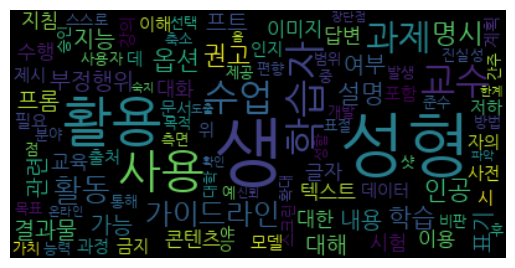

In [3]:
from wordcloud import WordCloud
# 단어 빈도수가 두 번 이상 나타난 단어에 대해서 wordcloud 생성
c = Counter(cleaned_noun_list)
len = 0
for key, val in c.items():
    if(val > 1) :
        len += 1
top_nouns = dict(c.most_common(len))
# print(top_nouns)

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=FONT_PATH, max_font_size = 60).generate_from_frequencies(top_nouns)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## step3 - SNA

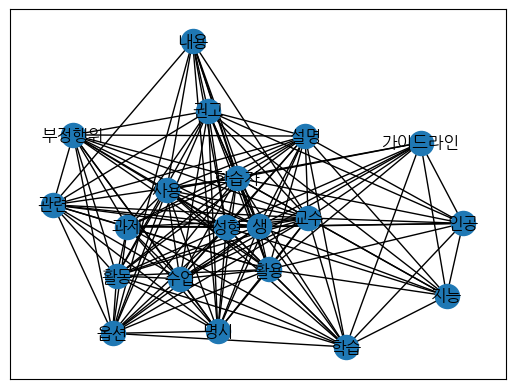

In [4]:
# SNA
c = Counter(cleaned_noun_list)
NUM_WORDS = 20
top_nouns = dict(c.most_common(NUM_WORDS))
#print(top_nouns)
unique_nouns = list(top_nouns.keys())

g = nx.Graph()
g.add_nodes_from(unique_nouns)

for pair in list(itertools.combinations(list(unique_nouns), 2)):
    if pair[0] == pair[1]:
        continue
    for sent in cleaned_sentence_list:
        if pair[0] in sent and pair[1] in sent:
            if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()):
                g[pair[0]][pair[1]]['weight'] += 1 # tie가 있으면 weight만 추가
            else:
                g.add_edge(pair[0], pair[1], weight=1 )

nx.draw_networkx(g, font_family='NanumGothic')

plt.show()

In [5]:
print('연결중심도')
print(sorted(nx.degree_centrality(g).items(), key=(lambda x :x[1]), reverse=True))
print('\n매개중심도')
print(sorted(nx.betweenness_centrality(g).items(), key=(lambda x :x[1]), reverse=True))
print('\n근접중심도')
print(sorted(nx.closeness_centrality(g).items(), key=(lambda x :x[1]), reverse=True))

for item in unique_nouns:
    connected_word_list = list(g[item].keys())
    num = g[item].__len__()
    print('\n[{}]: {}개 단어와 연결:'.format(item, num), end ='')
    print(connected_word_list)

연결중심도
[('생', 1.0), ('성형', 1.0), ('활용', 1.0), ('학습자', 1.0), ('교수', 1.0), ('수업', 0.8421052631578947), ('권고', 0.8421052631578947), ('설명', 0.8421052631578947), ('사용', 0.7894736842105263), ('과제', 0.7894736842105263), ('활동', 0.7894736842105263), ('명시', 0.7894736842105263), ('옵션', 0.7894736842105263), ('학습', 0.7368421052631579), ('부정행위', 0.7368421052631579), ('관련', 0.7368421052631579), ('가이드라인', 0.5263157894736842), ('인공', 0.5263157894736842), ('지능', 0.5263157894736842), ('내용', 0.5263157894736842)]

매개중심도
[('생', 0.028724297145349773), ('성형', 0.028724297145349773), ('활용', 0.028724297145349773), ('학습자', 0.028724297145349773), ('교수', 0.028724297145349773), ('권고', 0.016262879420774156), ('설명', 0.013733115487501453), ('사용', 0.010728631342666429), ('학습', 0.01055184256938643), ('수업', 0.009607059607059607), ('옵션', 0.006209677262308842), ('명시', 0.004306349920385008), ('과제', 0.0034527850317323996), ('활동', 0.0034527850317323996), ('관련', 0.0034066648101735817), ('가이드라인', 0.002761533463287849), ('인공', 0.0